<a href="https://colab.research.google.com/github/dbeltranor/training_projects/blob/main/hotel_demand_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/kaggle_api_credentials/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 94.7MB/s]


In [ ]:
!unzip hotel-booking-demand.zip

Archive:  hotel-booking-demand.zip
  inflating: hotel_bookings.csv      


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from prophet import Prophet

In [ ]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.meal.value_counts() / df.meal.count()

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

In [ ]:
df.market_segment.value_counts() / df.market_segment.count()

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

In [ ]:
df.hotel.value_counts() / df.hotel.count()

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

In [ ]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

# **Filling missing values:**
- Children tab show reservation was cancelled, therefore, no children will be added.
- Agent tab is a numeric ID, there's no real utility to this tab besides counting which travel angency made the most reservations. Will be filled with 999 as missing value.
- company: Same as agent, will be filled with 999 for missing value.
- Country: Pending what to do could be filled as undefined to avoid any false input.


In [ ]:
df['children'].fillna(0, inplace=True)

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df['agent'].fillna(999, inplace=True)
df['company'].fillna(999, inplace= True)

In [ ]:
df['country'].fillna('Undefined', inplace=True)

# ***EDA - Charting***

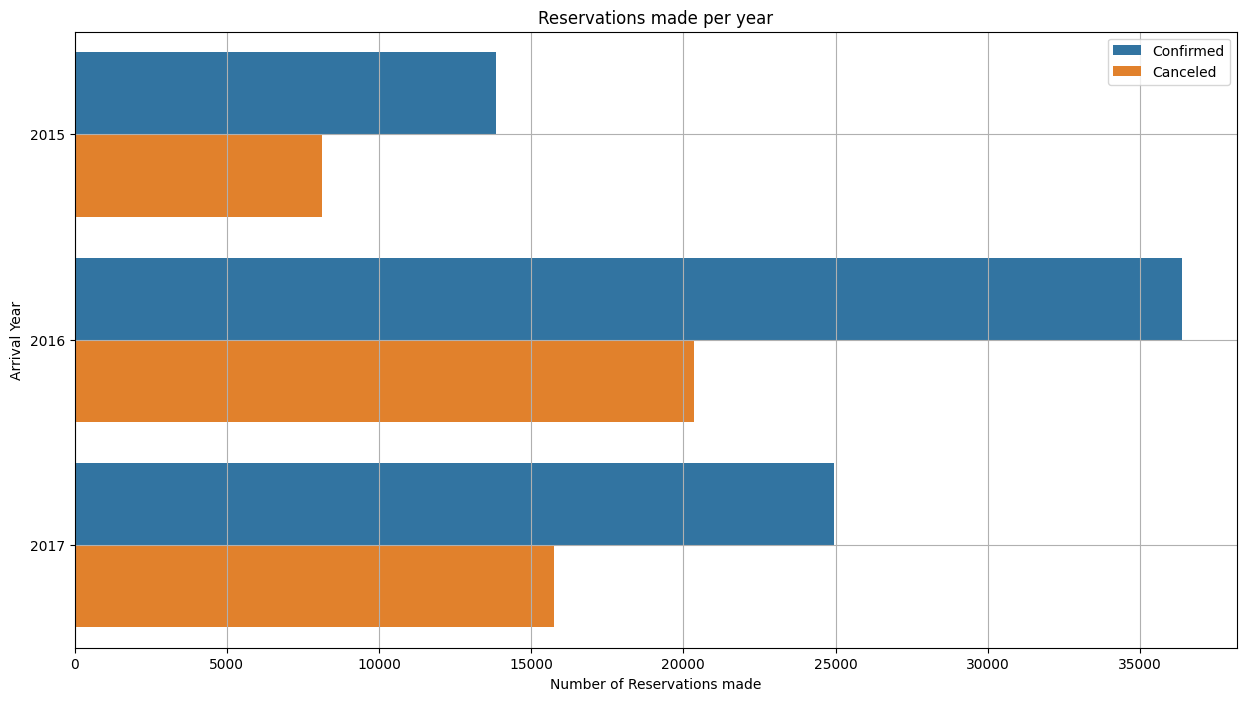

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.countplot(data= df, y='arrival_date_year', hue='is_canceled')
plt.title('Reservations made per year')
plt.ylabel('Arrival Year')
plt.xlabel('Number of Reservations made')
plt.legend(labels= ['Confirmed', 'Canceled'])
plt.grid()
plt.show()

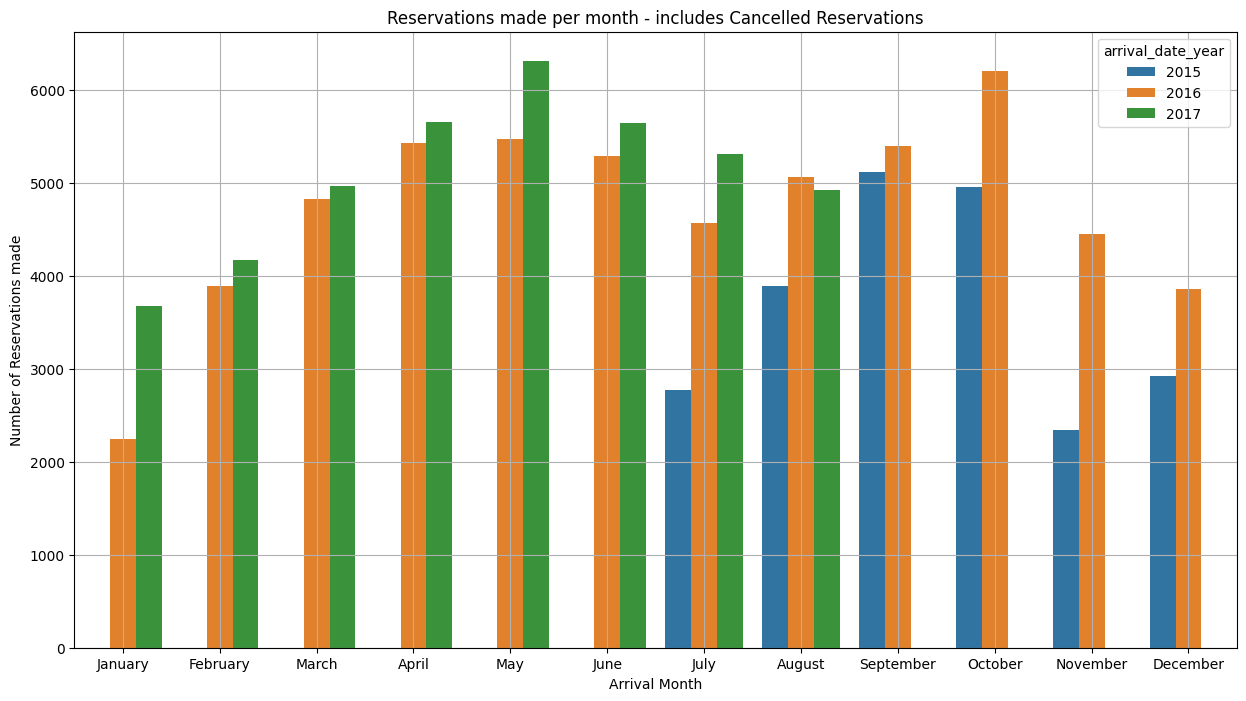

In [ ]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
fig = plt.figure(figsize=(15,8))
sns.countplot(data= df, x='arrival_date_month', order= months, hue='arrival_date_year')
plt.title('Reservations made per month - includes Cancelled Reservations')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Reservations made')
plt.grid()
plt.show()

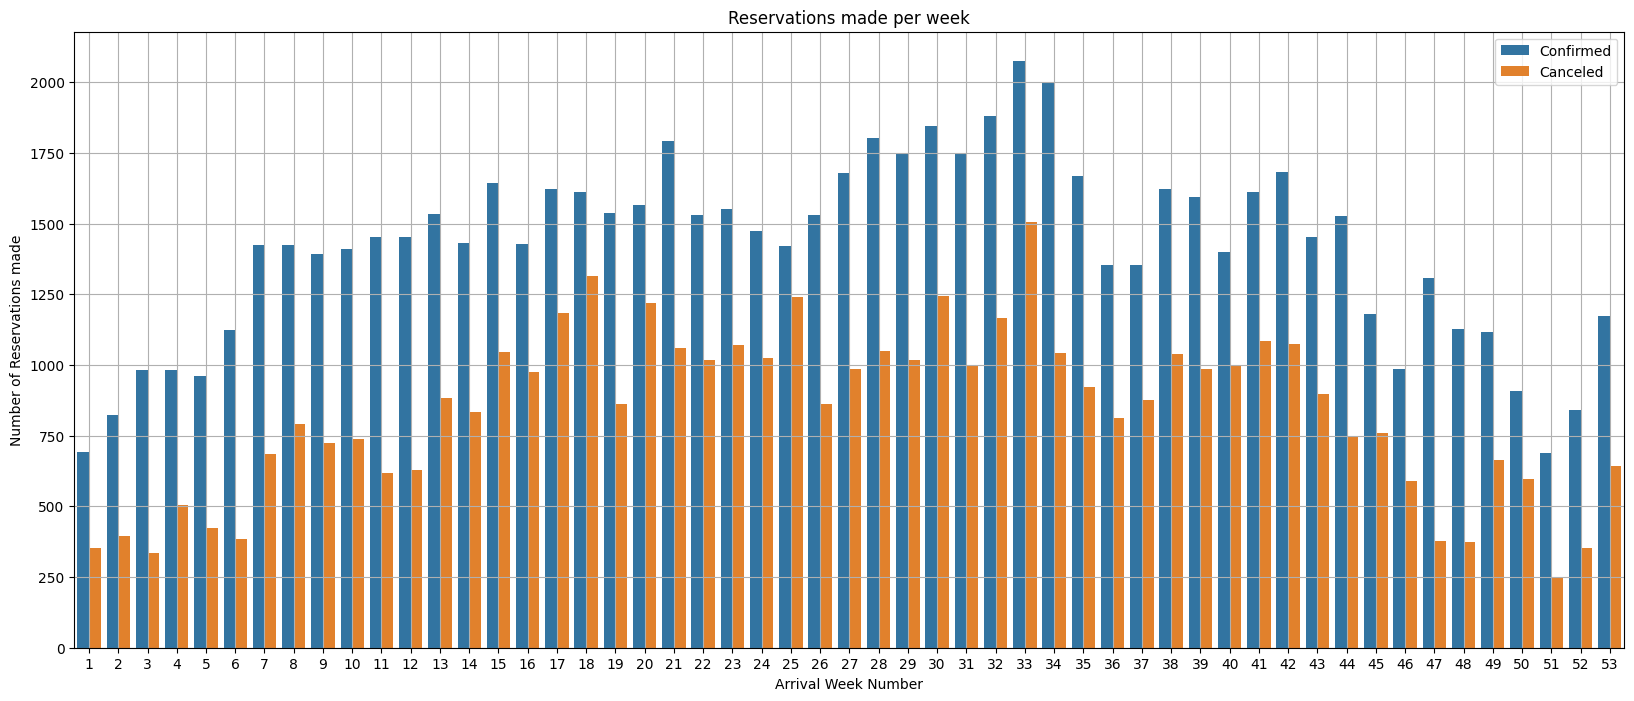

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.countplot(data= df, x='arrival_date_week_number', hue='is_canceled')
plt.title('Reservations made per week')
plt.xlabel('Arrival Week Number')
plt.ylabel('Number of Reservations made')
plt.legend(labels=['Confirmed', 'Canceled'])
plt.grid()
plt.show()

In [ ]:
top_10_countries = df['country'].value_counts().nlargest(10).to_frame()
top_10_countries
# fig = plt.figure(figsize=(15,8))
# sns.barplot(data=top_10_countries, x=1)
# plt.title('Reservations by Country of origin')
# plt.xlabel('Country')
# plt.ylabel('Number of Reservations made')
# plt.legend(labels=['Confirmed', 'Canceled'])
# plt.grid()
# plt.show()

,country
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
ITA,3766
IRL,3375
BEL,2342
BRA,2224
NLD,2104


# Q1: Best time of the year to book?
### Focus on:
* Rates per month
* Booking window check
* Check LOS

In [ ]:

months_dict = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}


In [ ]:
data_q1 = df.copy()
data_q1['year'] = data_q1['arrival_date_year']
data_q1['month'] = data_q1['arrival_date_month'].map(months_dict)
data_q1['day'] = data_q1['arrival_date_day_of_month']
data_q1['los'] = data_q1['stays_in_week_nights'] + data_q1['stays_in_weekend_nights']
data_q1.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,day,los
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2015,7,1,2


In [ ]:
data_q1['date'] = pd.to_datetime(data_q1[['year', 'month', 'day']], format='%Y-%m-%d')

In [ ]:
data_q1.drop(['year', 'month', 'day', 'booking_changes', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis=1, inplace= True)

In [ ]:
data_q1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'los', 'date'],
      dtype='object')

In [ ]:
data_q1 = data_q1.groupby(['date', 'hotel','reservation_status']).mean()
data_q1.head(10)

is_canceled   lead_time  \
date       hotel        reservation_status                            
2015-07-01 City Hotel   Canceled                    1.0  203.142857   
                        Check-Out                   0.0  250.800000   
           Resort Hotel Canceled                    1.0   67.800000   
                        Check-Out                   0.0   86.789474   
2015-07-02 City Hotel   Canceled                    1.0  240.108696   
                        Check-Out                   0.0    3.000000   
                        No-Show                     1.0   62.000000   
           Resort Hotel Canceled                    1.0   61.555556   
                        Check-Out                   0.0   71.857143   
2015-07-03 City Hotel   Canceled                    1.0   58.166667   

                                            stays_in_weekend_nights  \
date       hotel        reservation_status                            
2015-07-01 City Hotel   Canceled                           0.214286   
                        Check-Out                          0.030769   
           Resort Hotel Canceled                           0.800000   
                        Check-Out                          0.947368   
2015-07-02 City Hotel   Canceled                           0.086957   
                        Check-Out                          0.000000   
                        No-Show                            2.000000   
           Resort Hotel Canceled                           1.333333   
                        Check-Out                          1.571429   
2015-07-03 City Hotel   Canceled                           0.166667   

                                            stays_in_week_nights    adults  \
date       hotel        reservation_status                                   
2015-07-01 City Hotel   Canceled                        2.571429  1.928571   
                        Check-Out                       2.061538  1.784615   
           Resort Hotel Canceled                        4.600000  2.000000   
                        Check-Out                       3.736842  1.842105   
2015-07-02 City Hotel   Canceled                        2.152174  1.978261   
                        Check-Out                       3.000000  1.000000   
                        No-Show                         3.000000  2.000000   
           Resort Hotel Canceled                        4.000000  2.222222   
                        Check-Out                       4.200000  2.000000   
2015-07-03 City Hotel   Canceled                        2.000000  1.666667   

                                            children  babies  \
date       hotel        reservation_status                     
2015-07-01 City Hotel   Canceled            0.000000     0.0   
                        Check-Out           0.000000     0.0   
           Resort Hotel Canceled            0.000000     0.0   
                        Check-Out           0.052632     0.0   
2015-07-02 City Hotel   Canceled            0.000000     0.0   
                        Check-Out           0.000000     0.0   
                        No-Show             0.000000     0.0   
           Resort Hotel Canceled            0.222222     0.0   
                        Check-Out           0.057143     0.0   
2015-07-03 City Hotel   Canceled            0.000000     0.0   

                                            is_repeated_guest  \
date       hotel        reservation_status                      
2015-07-01 City Hotel   Canceled                     0.000000   
                        Check-Out                    0.000000   
           Resort Hotel Canceled                     0.000000   
                        Check-Out                    0.026316   
2015-07-02 City Hotel   Canceled                     0.456522   
                        Check-Out                    0.000000   
                        No-Show                      0.000000   
           Resort Hotel Canceled               

In [ ]:
data_q1.reset_index(inplace= True)
data_q1.head()

,index,date,hotel,reservation_status,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,los
0,0,2015-07-01,City Hotel,Canceled,1.0,203.142857,0.214286,2.571429,1.928571,0.000000,...,0.000000,0.785714,0.000000,7.285714,999.0,0.0,90.178571,0.000000,0.714286,2.785714
1,1,2015-07-01,City Hotel,Check-Out,0.0,250.800000,0.030769,2.061538,1.784615,0.000000,...,0.000000,0.000000,0.000000,6.061538,999.0,0.0,95.076923,0.000000,0.000000,2.092308
2,2,2015-07-01,Resort Hotel,Canceled,1.0,67.800000,0.800000,4.600000,2.000000,0.000000,...,0.000000,0.000000,0.000000,346.800000,999.0,0.0,105.160000,0.000000,1.000000,5.400000
3,3,2015-07-01,Resort Hotel,Check-Out,0.0,86.789474,0.947368,3.736842,1.842105,0.052632,...,0.026316,0.000000,0.236842,389.052632,935.5,0.0,88.337632,0.105263,0.631579,4.684211
4,4,2015-07-02,City Hotel,Canceled,1.0,240.108696,0.086957,2.152174,1.978261,0.000000,...,0.456522,0.956522,0.000000,2.043478,999.0,0.0,64.054348,0.000000,0.108696,2.239130


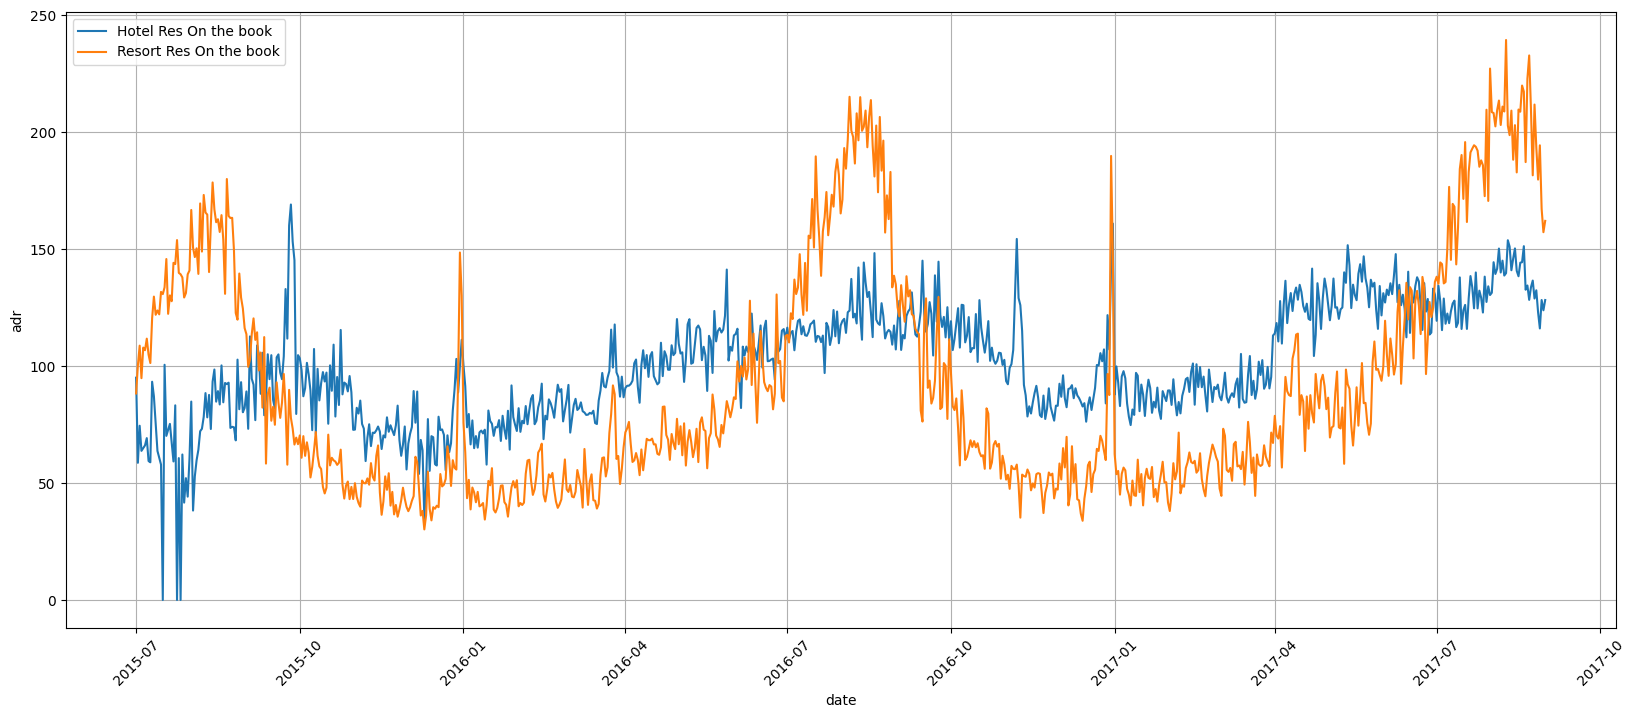

In [ ]:
best_time_hotel = data_q1[(data_q1['reservation_status'] == 'Check-Out') & (data_q1['hotel'] == 'City Hotel')]
best_time_resort = data_q1[(data_q1['reservation_status'] == 'Check-Out') & (data_q1['hotel'] == 'Resort Hotel')]
# best_time.columns
fig = plt.figure(figsize=(20,8))
# ax = plt.plot(kind='line', x= best_time_hotel.date, y=best_time_hotel.adr, label= 'Hotel Res On the book')
# # best_time_resort.adr.plot(kind='line', label= 'Hotel Res On the book')
sns.lineplot(data= best_time_hotel, x='date', y='adr', label= 'Hotel Res On the book')
sns.lineplot(data= best_time_resort, x='date', y='adr', label= 'Resort Res On the book')
# ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()




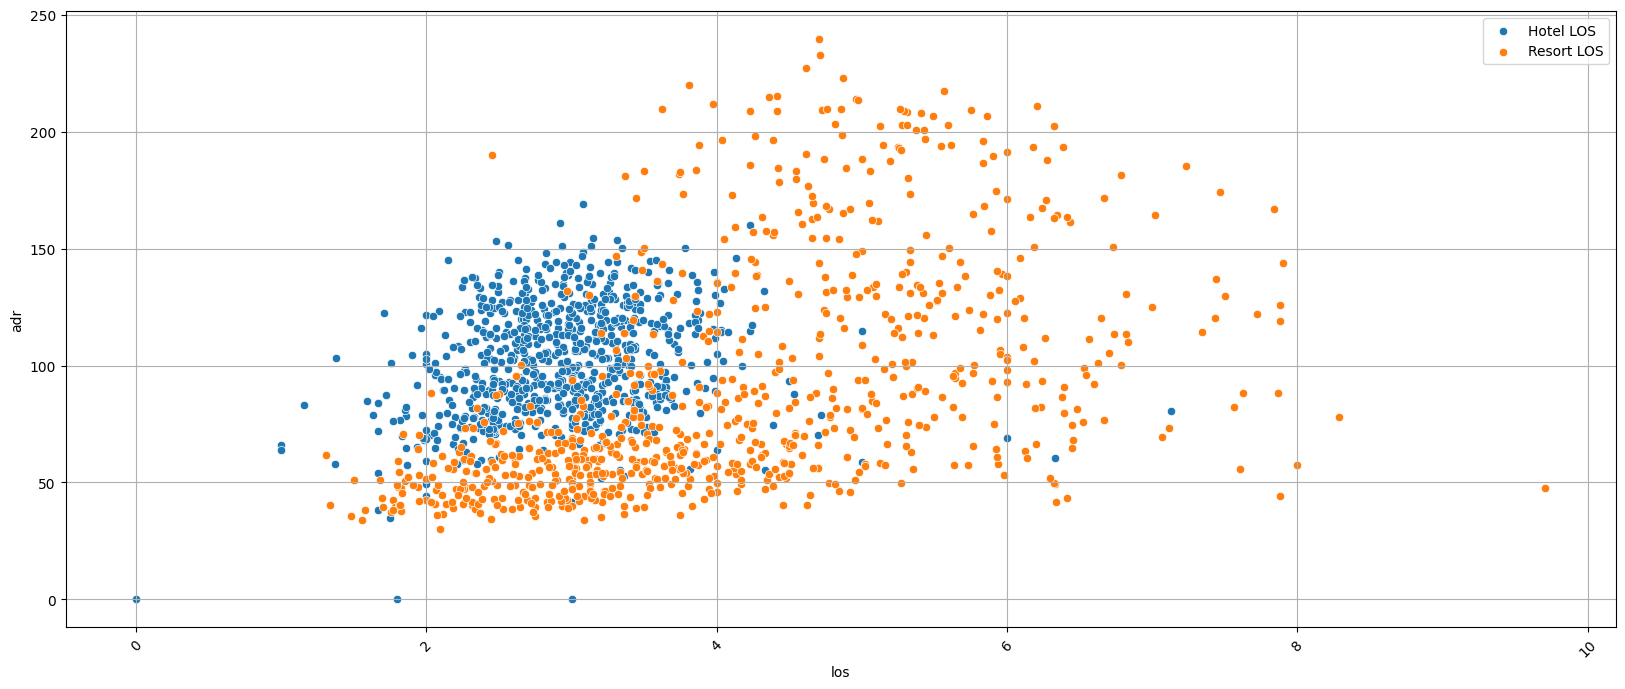

In [ ]:
best_time_hotel = data_q1[(data_q1['reservation_status'] == 'Check-Out') & (data_q1['hotel'] == 'City Hotel')]
best_time_resort = data_q1[(data_q1['reservation_status'] == 'Check-Out') & (data_q1['hotel'] == 'Resort Hotel')]

fig = plt.figure(figsize=(20,8))
sns.scatterplot(data= best_time_hotel, x='los', y='adr', label= 'Hotel LOS')
sns.scatterplot(data= best_time_resort, x='los', y='adr', label= 'Resort LOS')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

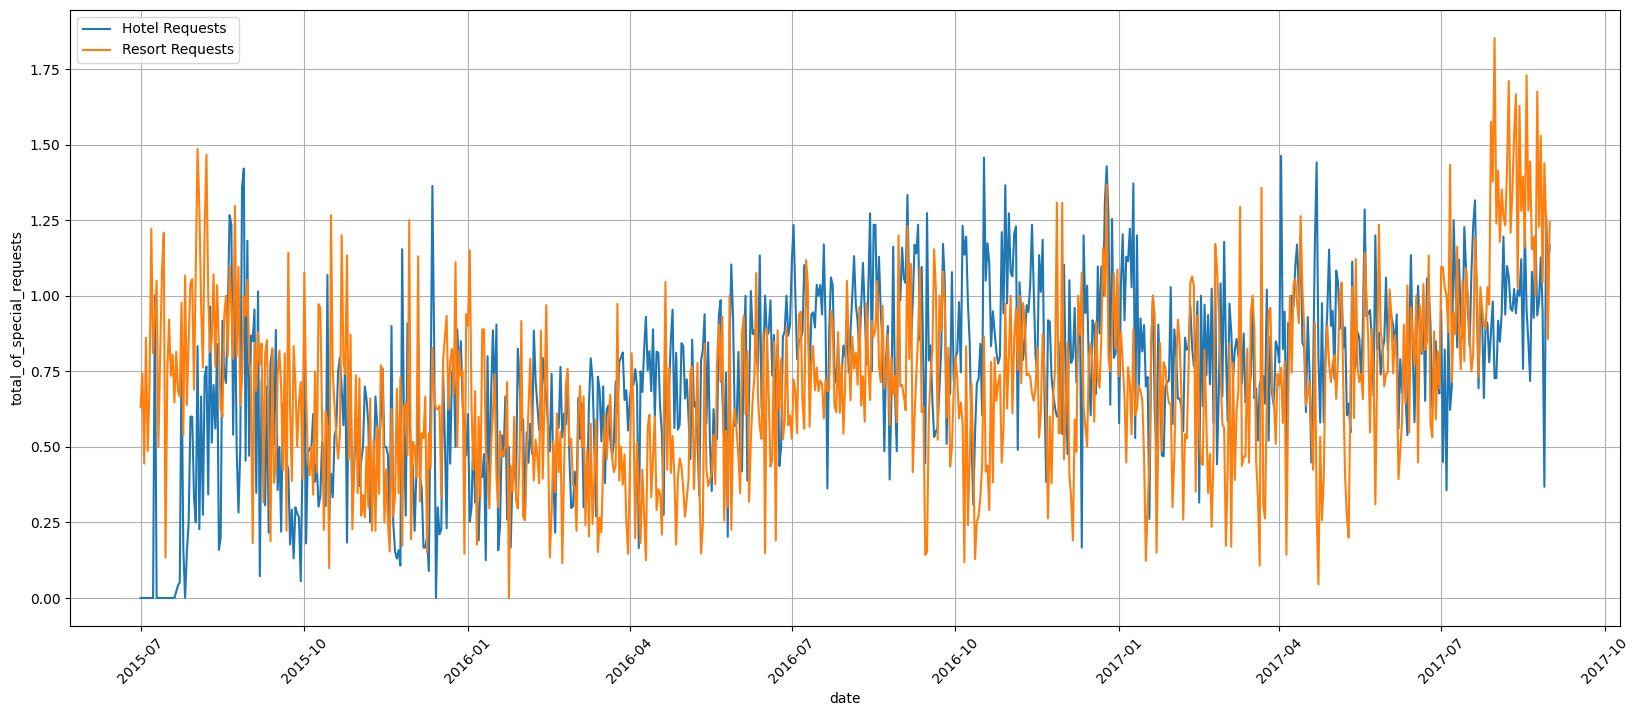

In [ ]:
best_time_hotel = data_q1[(data_q1['reservation_status'] == 'Check-Out') & (data_q1['hotel'] == 'City Hotel')]
best_time_resort = data_q1[(data_q1['reservation_status'] == 'Check-Out') & (data_q1['hotel'] == 'Resort Hotel')]

fig = plt.figure(figsize=(20,8))
sns.lineplot(data= best_time_hotel, x='date', y='total_of_special_requests', label= 'Hotel Requests')
sns.lineplot(data= best_time_resort, x='date', y='total_of_special_requests', label= 'Resort Requests')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

In [ ]:
new_df_hotel = best_time_hotel.copy()
new_df_resort = best_time_resort.copy()

new_df_hotel = new_df_hotel[['date', 'total_of_special_requests']].rename(columns={'date' : 'ds', 'total_of_special_requests': 'y'})
new_df_resort = new_df_resort[['date', 'total_of_special_requests']].rename(columns={'date' : 'ds', 'total_of_special_requests': 'y'})

In [ ]:
m_hotel = Prophet()
m_hotel.fit(new_df_hotel)
future_hotel = m_hotel.make_future_dataframe(periods=365)
forecast_hotel = m_hotel.predict(future_hotel)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4y721805/gvciifmc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4y721805/8nlkh3tb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25871', 'data', 'file=/tmp/tmp4y721805/gvciifmc.json', 'init=/tmp/tmp4y721805/8nlkh3tb.json', 'output', 'file=/tmp/tmp4y721805/prophet_model0kvja9c_/prophet_model-20230405103925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:39:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


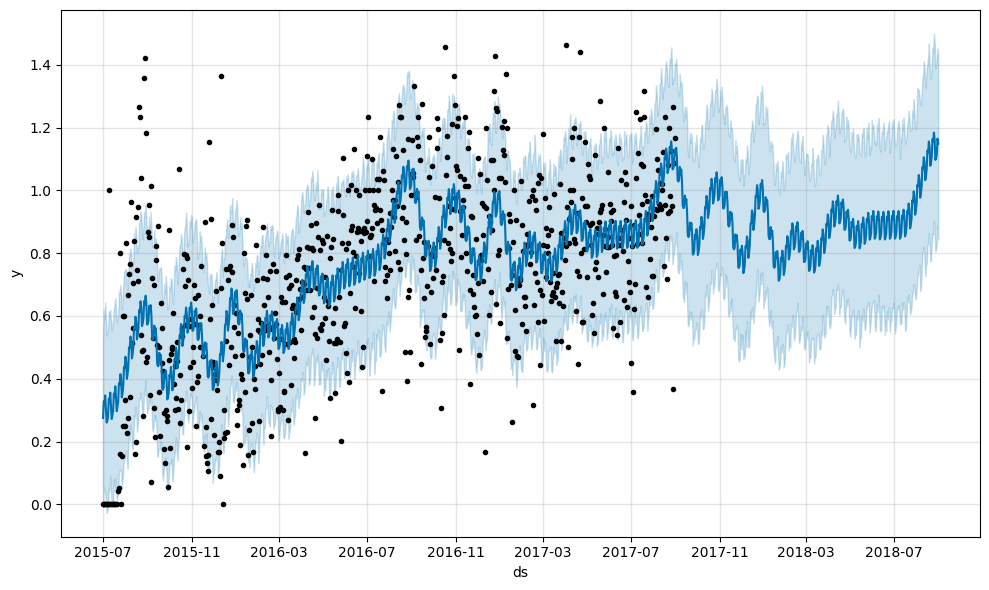

In [ ]:
fig1 = m_hotel.plot(forecast_hotel)

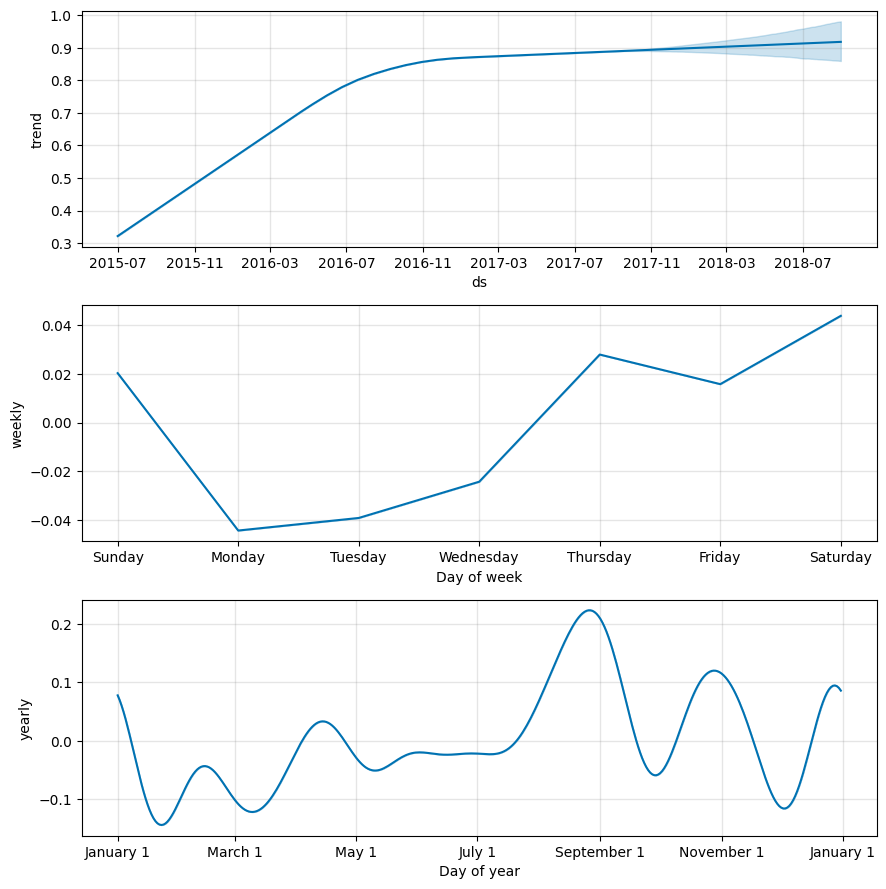

In [ ]:
fig1_comp = m_hotel.plot_components(forecast_hotel)

In [ ]:
m_resort = Prophet()
m_resort.fit(new_df_resort)
future_resort = m_resort.make_future_dataframe(periods=365)
forecast_resort = m_resort.predict(future_resort)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4y721805/yrp80tr5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4y721805/ss4fwcrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93254', 'data', 'file=/tmp/tmp4y721805/yrp80tr5.json', 'init=/tmp/tmp4y721805/ss4fwcrw.json', 'output', 'file=/tmp/tmp4y721805/prophet_modelasqo6xmj/prophet_model-20230405104140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


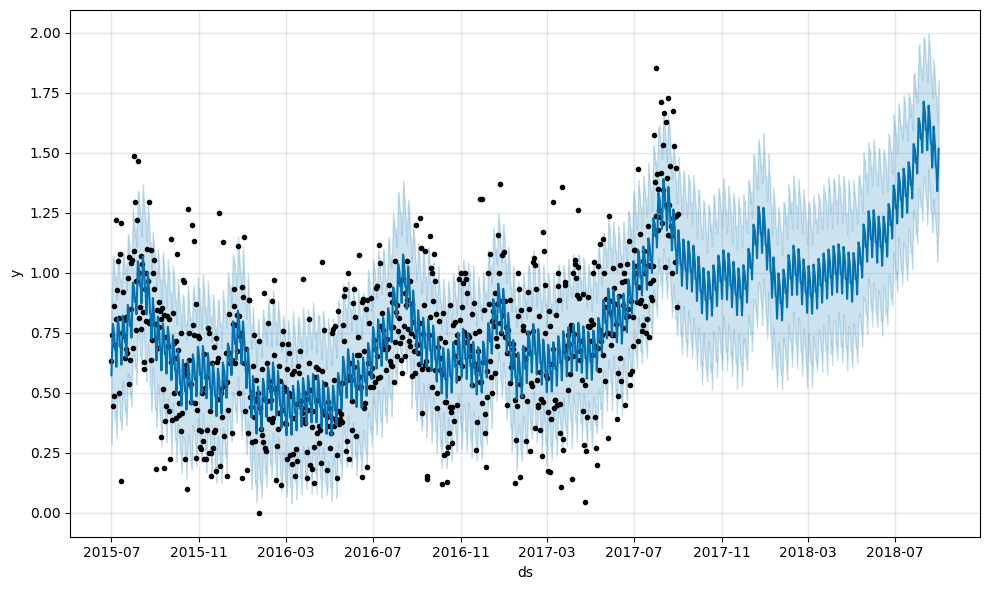

In [ ]:
fig2 = m_resort.plot(forecast_resort)

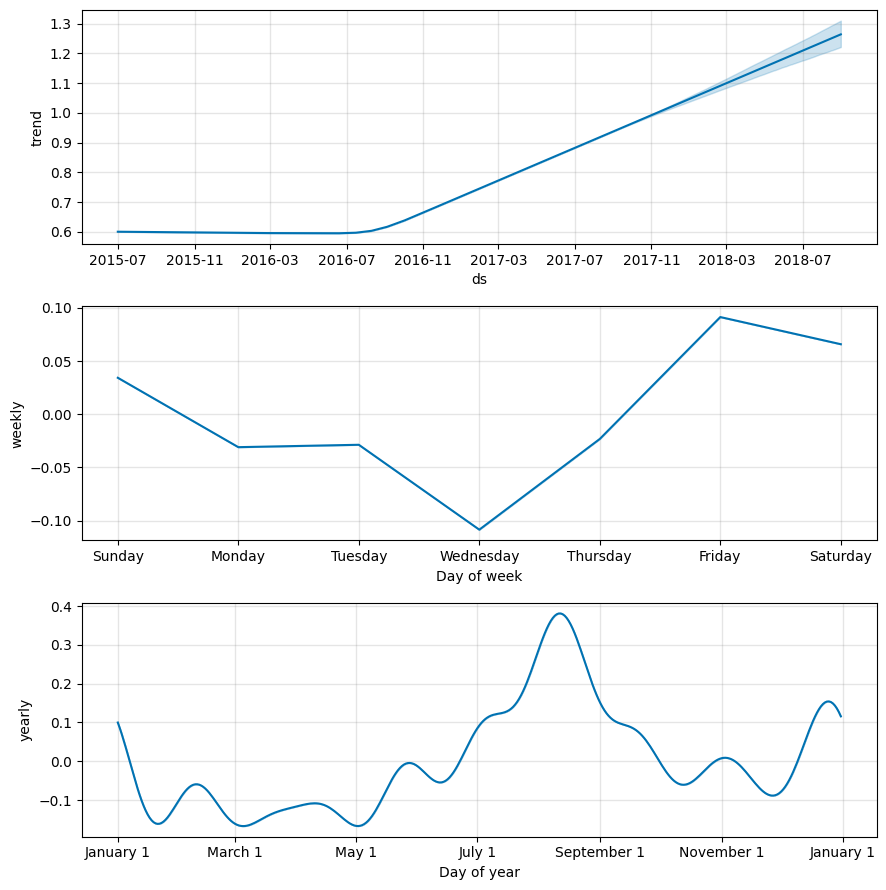

In [ ]:
fig2_comp = m_resort.plot_components(forecast_resort)